# Problem Statement:
## How good is player X against CSK in Chepauk when they’re playing 3 spinners?

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [3]:
df = deliveries.copy()

## Player Analysis :
* Extract player-level statistics
* Determine player type from the above stats

In [4]:
df['Dotballs'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0 )
df['Ones'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0 )
df['Twos'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0 )
df['Threes'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0 )
df['Fours'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0 )
df['Sixes'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0 )

runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'Runs'})

balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count().reset_index()).rename(columns= {'match_id':'Balls'})

innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x : len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'Innings'})

dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed':'Dismissals'})

dots = pd.DataFrame(df.groupby(['batsman'])['Dotballs'].sum().reset_index())
ones = pd.DataFrame(df.groupby(['batsman'])['Ones'].sum().reset_index())
twos = pd.DataFrame(df.groupby(['batsman'])['Twos'].sum().reset_index())
threes = pd.DataFrame(df.groupby(['batsman'])['Threes'].sum().reset_index())
fours = pd.DataFrame(df.groupby(['batsman'])['Fours'].sum().reset_index())
sixes = pd.DataFrame(df.groupby(['batsman'])['Sixes'].sum().reset_index())
df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
df['SR'] = df.apply(lambda x : 100*(x['Runs']/x['Balls']),axis = 1)

df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'],axis = 1)

def Balls_Per_Dismissal(balls,dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1

df['BPD'] = df.apply(lambda x: Balls_Per_Dismissal(x['Balls'],x['Dismissals']), axis = 1)

def Balls_Per_Boundary(balls,boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

df['BPB'] = df.apply(lambda x: Balls_Per_Boundary(x['Balls'],(x['Fours']+ x['Sixes'])), axis = 1)

In [5]:
df = df.rename(columns= {'batsman':'Batsman'})

In [6]:
df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
2,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
3,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000


* Performance by innings --- (Bat 1st/2nd)

In [7]:
def ByInnings(df,current_innings):
    df = df[df.inning == current_innings]
    df.reset_index(inplace = True, drop = True)

    df['Dotballs'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0 )
    df['Ones'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0 )
    df['Twos'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0 )
    df['Threes'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0 )
    df['Fours'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0 )
    df['Sixes'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0 )

    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count().reset_index()).rename(columns= {'match_id':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed':'Dismissals'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x : len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'Innings'})

    dots = pd.DataFrame(df.groupby(['batsman'])['Dotballs'].sum().reset_index())
    ones = pd.DataFrame(df.groupby(['batsman'])['Ones'].sum().reset_index())
    twos = pd.DataFrame(df.groupby(['batsman'])['Twos'].sum().reset_index())
    threes = pd.DataFrame(df.groupby(['batsman'])['Threes'].sum().reset_index())
    fours = pd.DataFrame(df.groupby(['batsman'])['Fours'].sum().reset_index())
    sixes = pd.DataFrame(df.groupby(['batsman'])['Sixes'].sum().reset_index())

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    df = df.rename(columns= {'batsman':'Batsman'})

    df['SR'] = df.apply(lambda x : 100*(x['Runs']/x['Balls']),axis = 1)
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'],axis = 1)
    df['BPD'] = df.apply(lambda x: Balls_Per_Dismissal(x['Balls'],x['Dismissals']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_Per_Boundary(x['Balls'],(x['Fours']+ x['Sixes'])), axis = 1)

    return df

In [8]:
ing1_df = ByInnings(deliveries,1)
ing2_df = ByInnings(deliveries,2)

In [9]:
ing1_df.head(3)

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,13,166,115,7,32,53,13,1,6,10,144.347826,12.769231,16.428571,7.187500
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
2,A Chopra,5,51,72,4,44,19,2,0,7,0,70.833333,10.200000,18.000000,10.285714


In [10]:
ing2_df.head(3)

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,10,114,81,8,29,30,7,0,10,5,140.740741,11.4,10.125,5.4
1,A Chopra,1,2,3,1,1,2,0,0,0,0,66.666667,2.0,3.000,3.0
2,A Choudhary,2,10,8,2,3,4,0,0,0,1,125.000000,5.0,4.000,8.0


In [11]:
comp = ing1_df[['Batsman', 'RPI']].merge(ing2_df[['Batsman', 'RPI']], on = 'Batsman', how = 'inner').rename(columns = {'RPI_x':'1st_RPI', 'RPI_y':'2nd_RPI' })

comp.head()

,Batsman,1st_RPI,2nd_RPI
0,A Ashish Reddy,12.769231,11.4
1,A Chopra,10.200000,2.0
2,A Choudhary,15.000000,5.0
3,A Flintoff,22.000000,20.0
4,A Hales,17.666667,33.0


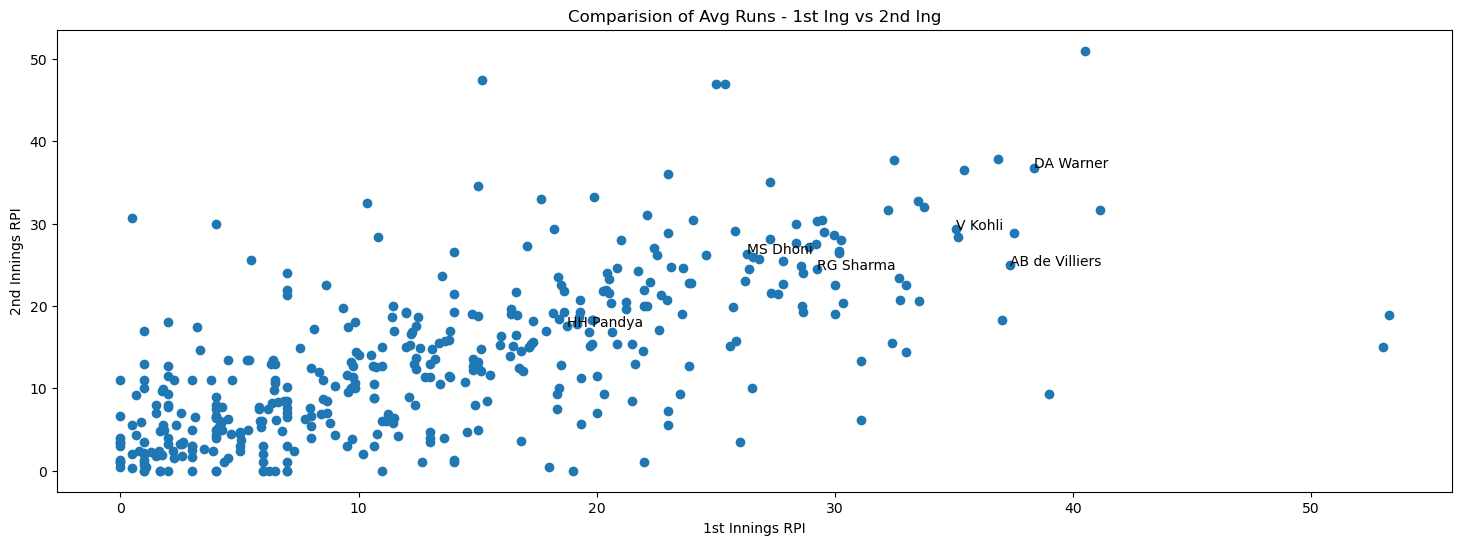

In [12]:
plt.figure(figsize = (18, 6))
plt.scatter(comp['1st_RPI'], comp['2nd_RPI'] )
plt.xlabel('1st Innings RPI')
plt.ylabel('2nd Innings RPI')
plt.title('Comparision of Avg Runs - 1st Ing vs 2nd Ing')

annotations=list(comp['Batsman'])
selected_players = ['RG Sharma', 'V Kohli', 'AB de Villiers', 'DA Warner', 'HH Pandya', 'AD Russel', 'MS Dhoni']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (comp['1st_RPI'][i], comp['2nd_RPI'][i]))


plt.show()


* Performance in diff phases of play --- (PP/Middle/Death)


In [13]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

deliveries['Batting_phase'] = deliveries['over'].apply(lambda x: phase(x))

def phasesOfplay(df, current_phase):

    df = df[df.Batting_phase == current_phase]
    df.reset_index(inplace = True, drop = True)

    df['Dotballs'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0 )
    df['Ones'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0 )
    df['Twos'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0 )
    df['Threes'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0 )
    df['Fours'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0 )
    df['Sixes'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0 )

    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count().reset_index()).rename(columns= {'match_id':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed':'Dismissals'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x : len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'Innings'})

    dots = pd.DataFrame(df.groupby(['batsman'])['Dotballs'].sum().reset_index())
    ones = pd.DataFrame(df.groupby(['batsman'])['Ones'].sum().reset_index())
    twos = pd.DataFrame(df.groupby(['batsman'])['Twos'].sum().reset_index())
    threes = pd.DataFrame(df.groupby(['batsman'])['Threes'].sum().reset_index())
    fours = pd.DataFrame(df.groupby(['batsman'])['Fours'].sum().reset_index())
    sixes = pd.DataFrame(df.groupby(['batsman'])['Sixes'].sum().reset_index())

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    df = df.rename(columns= {'batsman':'Batsman'})

    df['SR'] = df.apply(lambda x : 100*(x['Runs']/x['Balls']),axis = 1)
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'],axis = 1)
    df['BPD'] = df.apply(lambda x: Balls_Per_Dismissal(x['Balls'],x['Dismissals']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_Per_Boundary(x['Balls'],(x['Fours']+ x['Sixes'])), axis = 1)

    return df

In [14]:
pp_df = phasesOfplay(deliveries, 'Powerplay')
mid_df = phasesOfplay(deliveries, 'Middle')
dth_df = phasesOfplay(deliveries, 'Death')

In [15]:
pp_df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.000000,7.000000,7.000000
1,A Chopra,5,27,41,2,26,11,0,0,4,0,65.853659,5.400000,20.500000,10.250000
2,A Flintoff,1,14,15,0,11,1,0,1,1,1,93.333333,14.000000,15.000000,7.500000
3,A Hales,6,118,82,3,34,24,7,0,11,6,143.902439,19.666667,27.333333,4.823529
4,A Mishra,1,1,5,0,4,1,0,0,0,0,20.000000,1.000000,5.000000,5.000000


In [16]:
mid_df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,5,61,41,0,16,13,5,0,2,5,148.780488,12.200000,41.000000,5.857143
1,A Chopra,3,25,32,2,18,9,2,0,3,0,78.125000,8.333333,16.000000,10.666667
2,A Flintoff,2,23,24,1,8,13,1,0,2,0,95.833333,11.500000,24.000000,12.000000
3,A Hales,3,34,37,3,12,20,3,0,2,0,91.891892,11.333333,12.333333,18.500000
4,A Kumble,1,1,5,0,4,1,0,0,0,0,20.000000,1.000000,5.000000,5.000000


In [17]:
dth_df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,22,214,148,14,40,69,15,1,13,10,144.594595,9.727273,10.571429,6.434783
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
2,A Chopra,1,1,2,1,1,1,0,0,0,0,50.000000,1.000000,2.000000,2.000000
3,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000


# Team Analysis
* Performance against oppositions --- (RPI/SR)

In [18]:
def ByOpposition(df, current_opposition):

    df = df[df.bowling_team == current_opposition]
    df.reset_index(inplace = True, drop = True)

    df['Dotballs'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0 )
    df['Ones'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0 )
    df['Twos'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0 )
    df['Threes'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0 )
    df['Fours'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0 )
    df['Sixes'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0 )

    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count().reset_index()).rename(columns= {'match_id':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed':'Dismissals'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x : len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'Innings'})

    dots = pd.DataFrame(df.groupby(['batsman'])['Dotballs'].sum().reset_index())
    ones = pd.DataFrame(df.groupby(['batsman'])['Ones'].sum().reset_index())
    twos = pd.DataFrame(df.groupby(['batsman'])['Twos'].sum().reset_index())
    threes = pd.DataFrame(df.groupby(['batsman'])['Threes'].sum().reset_index())
    fours = pd.DataFrame(df.groupby(['batsman'])['Fours'].sum().reset_index())
    sixes = pd.DataFrame(df.groupby(['batsman'])['Sixes'].sum().reset_index())

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    df = df.rename(columns= {'batsman':'Batsman'})

    df['SR'] = df.apply(lambda x : 100*(x['Runs']/x['Balls']),axis = 1)
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'],axis = 1)
    df['BPD'] = df.apply(lambda x: Balls_Per_Dismissal(x['Balls'],x['Dismissals']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_Per_Boundary(x['Balls'],(x['Fours']+ x['Sixes'])), axis = 1)

    return df


In [19]:
ByOpposition(deliveries,'Chennai Super Kings').head(4)

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,3,45,25,2,8,8,2,1,3,3,180.000000,15.00,12.5,4.166667
1,A Hales,1,2,9,1,7,2,0,0,0,0,22.222222,2.00,9.0,9.000000
2,A Kumble,2,3,6,0,4,1,1,0,0,0,50.000000,1.50,6.0,6.000000
3,A Mishra,8,58,64,5,35,16,6,0,6,1,90.625000,7.25,12.8,9.142857


In [20]:
selected_player = 'S Dhawan'

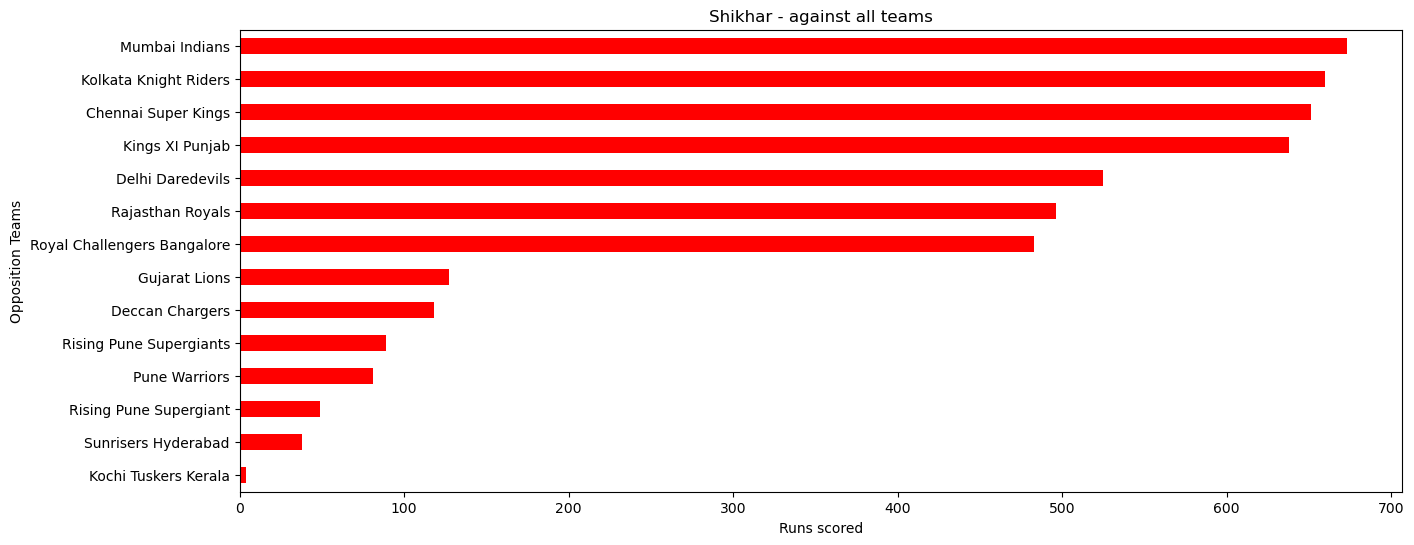

In [21]:
plt.figure(figsize = (15, 6))
deliveries[deliveries.batsman == selected_player].groupby(['bowling_team'])['batsman_runs'].sum().sort_values().plot(kind = 'barh', color = 'r')
plt.title('Shikhar - against all teams')
plt.xlabel('Runs scored')
plt.ylabel('Opposition Teams')
plt.show()


# Venue Analysis
* Toss Factor

In [22]:
def wintoss_winmatch(toss_decision, team1, team2, winner):
    if toss_decision == 'field':
        if team2 == winner:
            return True
        else:
            return False

    else:
        if team1 == winner:
            return True
        else:
            return False

In [23]:
matches['wintoss_winmatch'] = matches.apply(lambda x: wintoss_winmatch(x['toss_decision'], x['team1'], x['team2'], x['winner']), axis = 1)

In [24]:
matches[['id', 'season', 'team1', 'team2', 'wintoss_winmatch']].head()

,id,season,team1,team2,wintoss_winmatch
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,False
1,2,2017,Mumbai Indians,Rising Pune Supergiant,True
2,3,2017,Gujarat Lions,Kolkata Knight Riders,True
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,True
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,True


In [25]:
print('% of wintoss-winmatch =', 100*len(matches[matches.wintoss_winmatch == 1])/len(matches))

% of wintoss-winmatch = 51.98412698412698


In [26]:
def isOut(player_dismissed):
    try:
        x = math.isnan(player_dismissed)
        return 0
    except:
        return 1

def venueAnalysis(mdf, df):

    runs = pd.DataFrame(df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index())
    runs['Id_Ing'] = runs.apply(lambda x: str(x['match_id']) + '-' + str(x['inning']), axis = 1)

    balls = pd.DataFrame(df.groupby(['match_id', 'inning'])['total_runs'].count().reset_index()).rename(columns = {'total_runs':'total_balls'})
    balls['Id_Ing'] = balls.apply(lambda x: str(x['match_id']) + '-' + str(x['inning']), axis = 1)

    df['isOut'] = df['player_dismissed'].apply(lambda x: isOut(x))
    outs = pd.DataFrame(df.groupby(['match_id', 'inning'])['isOut'].sum().reset_index()).rename(columns = {'isOut':'wickets'})
    outs['Id_Ing'] = outs.apply(lambda x: str(x['match_id']) + '-' + str(x['inning']), axis = 1)

    df = pd.merge(runs, balls[['Id_Ing', 'total_balls']], on = 'Id_Ing').merge(outs[['Id_Ing', 'wickets']], on = 'Id_Ing')

    mdf = mdf.rename(columns = {'id':'match_id'})
    df = pd.merge(df, mdf[['match_id', 'venue']], on = 'match_id')
    df = df[['match_id', 'venue', 'inning', 'total_runs', 'total_balls', 'wickets']]

    return df


In [27]:
ven_df = venueAnalysis(matches, deliveries)
ven_df.head(10)  


,match_id,venue,inning,total_runs,total_balls,wickets
0,1,"Rajiv Gandhi International Stadium, Uppal",1,207,125,4
1,1,"Rajiv Gandhi International Stadium, Uppal",2,172,123,10
2,2,Maharashtra Cricket Association Stadium,1,184,125,8
3,2,Maharashtra Cricket Association Stadium,2,187,122,3
4,3,Saurashtra Cricket Association Stadium,1,183,122,4
5,3,Saurashtra Cricket Association Stadium,2,184,96,0
6,4,Holkar Cricket Stadium,1,163,125,6
7,4,Holkar Cricket Stadium,2,164,122,4
8,5,M Chinnaswamy Stadium,1,157,124,8
9,5,M Chinnaswamy Stadium,2,142,124,9


In [28]:
pd.DataFrame(ven_df.groupby('venue')['total_runs'].mean().sort_values(ascending = False)).rename(columns = {'total_runs':'Avg_Runs'}).reset_index().head(10)


,venue,Avg_Runs
0,IS Bindra Stadium,177.357143
1,Brabourne Stadium,174.636364
2,M. Chinnaswamy Stadium,167.357143
3,"Punjab Cricket Association IS Bindra Stadium, Mohali",167.178571
4,ACA-VDCA Stadium,164.500000
5,Rajiv Gandhi Intl. Cricket Stadium,163.812500
6,Maharashtra Cricket Association Stadium,163.595238
7,Barabati Stadium,162.714286
8,Green Park,162.250000
9,Holkar Cricket Stadium,162.222222


In [29]:
def ByVenue(df, current_venue):
    
     df = df[df.venue == current_venue]
     df.reset_index(inplace = True, drop = True)
    
     df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
     df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
     df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
     df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
     df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
     df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
     runs = pd.DataFrame(df.groupby(['batsman', 'match_id'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
     innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
     balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
     dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    
     dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
     ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
     twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
     threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
     fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
     sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
     df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    
  
     df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
     df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
     df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
     df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
     return df

In [30]:
matches.rename(columns = {'id':'match_id'}, inplace = True)

In [31]:
combined_data = deliveries.merge(matches[['match_id', 'venue']], on = 'match_id', how = 'left')
combined_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Batting_phase,isOut,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"


In [32]:
current_venue = 'MA Chidambaram Stadium'

In [34]:
df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
2,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
3,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
4,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000


## Filters in our problem statement:
* Stadium = MA Chidambaram Stadium
* Phase = Middle Overs
* Oppostion Team = Chennai Super Kings

In [35]:
def ByCustom(df, current_venue, current_phase, current_opposition):

    df = df[df.venue == current_venue]
    df = df[df.Batting_phase == current_phase]
    df = df[df.bowling_team == current_opposition]

    df.reset_index(inplace = True, drop = True)

    df['Dotballs'] = df['batsman_runs'].apply(lambda x : 1 if x == 0 else 0 )
    df['Ones'] = df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0 )
    df['Twos'] = df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0 )
    df['Threes'] = df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0 )
    df['Fours'] = df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0 )
    df['Sixes'] = df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0 )

    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['match_id'].count().reset_index()).rename(columns= {'match_id':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed':'Dismissals'})
    innings = pd.DataFrame(df.groupby(['batsman'])['match_id'].apply(lambda x : len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'Innings'})

    dots = pd.DataFrame(df.groupby(['batsman'])['Dotballs'].sum().reset_index())
    ones = pd.DataFrame(df.groupby(['batsman'])['Ones'].sum().reset_index())
    twos = pd.DataFrame(df.groupby(['batsman'])['Twos'].sum().reset_index())
    threes = pd.DataFrame(df.groupby(['batsman'])['Threes'].sum().reset_index())
    fours = pd.DataFrame(df.groupby(['batsman'])['Fours'].sum().reset_index())
    sixes = pd.DataFrame(df.groupby(['batsman'])['Sixes'].sum().reset_index())

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')
    df = df.rename(columns= {'batsman':'Batsman'})

    df['SR'] = df.apply(lambda x : 100*(x['Runs']/x['Balls']),axis = 1)
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'],axis = 1)
    df['BPD'] = df.apply(lambda x: Balls_Per_Dismissal(x['Balls'],x['Dismissals']), axis = 1)
    df['BPB'] = df.apply(lambda x: Balls_Per_Boundary(x['Balls'],(x['Fours']+ x['Sixes'])), axis = 1)

    return df

In [36]:
df = ByCustom(combined_data, 'MA Chidambaram Stadium, Chepauk', 'Middle', 'Chennai Super Kings')

In [37]:
df['dot_percentage'] = df.apply(lambda x: x['Dotballs']/x['Balls'], axis = 1)

In [38]:
df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB,dot_percentage
0,A Mishra,1,14,16,1,9,4,1,0,2,0,87.500000,14.0,16.0,8.000000,0.562500
1,A Mithun,1,11,8,1,3,3,0,0,2,0,137.500000,11.0,8.0,4.000000,0.375000
2,A Symonds,1,27,27,0,12,11,1,0,2,1,100.000000,27.0,27.0,9.000000,0.444444
3,AB Agarkar,1,6,2,0,0,0,1,0,1,0,300.000000,6.0,2.0,2.000000,0.000000
4,AB de Villiers,4,88,61,1,17,26,5,2,10,1,144.262295,22.0,61.0,5.545455,0.278689


In [39]:
# import matplotlib.pyplot as plt
# import cv2

# image_path = 'saaty scale.jpg'
# img = cv2.imread(image_path)

# # Convert BGR to RGB (OpenCV reads images in BGR format by default)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Set the size of the figure to control the zoom level
# plt.figure(figsize=(20, 20))  # Adjust the values as needed

# # Display the image using matplotlib
# plt.imshow(img_rgb)
# plt.axis('off')  # Turn off axis
# plt.show()


In [40]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45

In [41]:
df = df[df.Innings >= 2 ]

In [42]:
df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dotballs,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB,dot_percentage
4,AB de Villiers,4,88,61,1,17,26,5,2,10,1,144.262295,22.0,61.0,5.545455,0.278689
6,AD Mathews,2,42,36,0,12,18,2,0,2,2,116.666667,21.0,36.0,9.000000,0.333333
7,AD Russell,2,37,27,1,7,13,3,0,3,1,137.037037,18.5,27.0,6.750000,0.259259
9,AL Menaria,2,22,30,1,14,12,3,0,1,0,73.333333,11.0,30.0,30.000000,0.466667
13,AT Rayudu,4,26,37,2,12,24,1,0,0,0,70.270270,6.5,18.5,37.000000,0.324324


### Calculation - Normalizing all values to same dimensions

In [43]:
df['calc_SR'] = df['SR'].apply(lambda x: x*x)
df['calc_RPI'] = df['RPI'].apply(lambda x: x*x)
df['calc_BPD'] = df['BPD'].apply(lambda x: x*x)
df['calc_dot_percentage'] = df['dot_percentage'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_dot_percentage']].sum(axis = 0))

df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

df['calc_SR'] = df['calc_SR'].apply(lambda x: x*wt_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x*wt_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x*wt_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df['calc_dot_percentage']), max(df['calc_dot_percentage'])

### Calculation - Comparision against the best & worst values

In [44]:
df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
df['dev_best_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1)

df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
df['dev_worst_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1)


### Final Step - Overall score for each player ( values from 0 - 1)

In [45]:
df['Score'] = df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [46]:
df[['Batsman', 'Score']].head()

,Batsman,Score
4,AB de Villiers,0.628602
6,AD Mathews,0.194351
7,AD Russell,0.294349
9,AL Menaria,0.023317
13,AT Rayudu,0.011035


### End Result: Top players for our required role

In [47]:
Final_df = df[[ 'Batsman','Innings', 'Runs', 'Balls', 'Dismissals', 'dot_percentage', 'Score']].sort_values(['Score'], ascending = False).reset_index(drop = True).head(25)

In [48]:
Final_df

,Batsman,Innings,Runs,Balls,Dismissals,dot_percentage,Score
0,SE Marsh,3,104,54,1,0.185185,0.943784
1,SR Watson,4,121,70,2,0.228571,0.737034
2,AB de Villiers,4,88,61,1,0.278689,0.628602
3,G Gambhir,3,86,73,1,0.287671,0.584161
4,NV Ojha,3,64,41,2,0.292683,0.462725
5,Y Venugopal Rao,3,67,51,1,0.313725,0.413556
6,MS Bisla,3,89,66,2,0.303030,0.400002
7,AD Russell,2,37,27,1,0.259259,0.294349
8,V Kohli,7,175,150,4,0.333333,0.233229
9,DJ Bravo,2,26,20,2,0.350000,0.195005


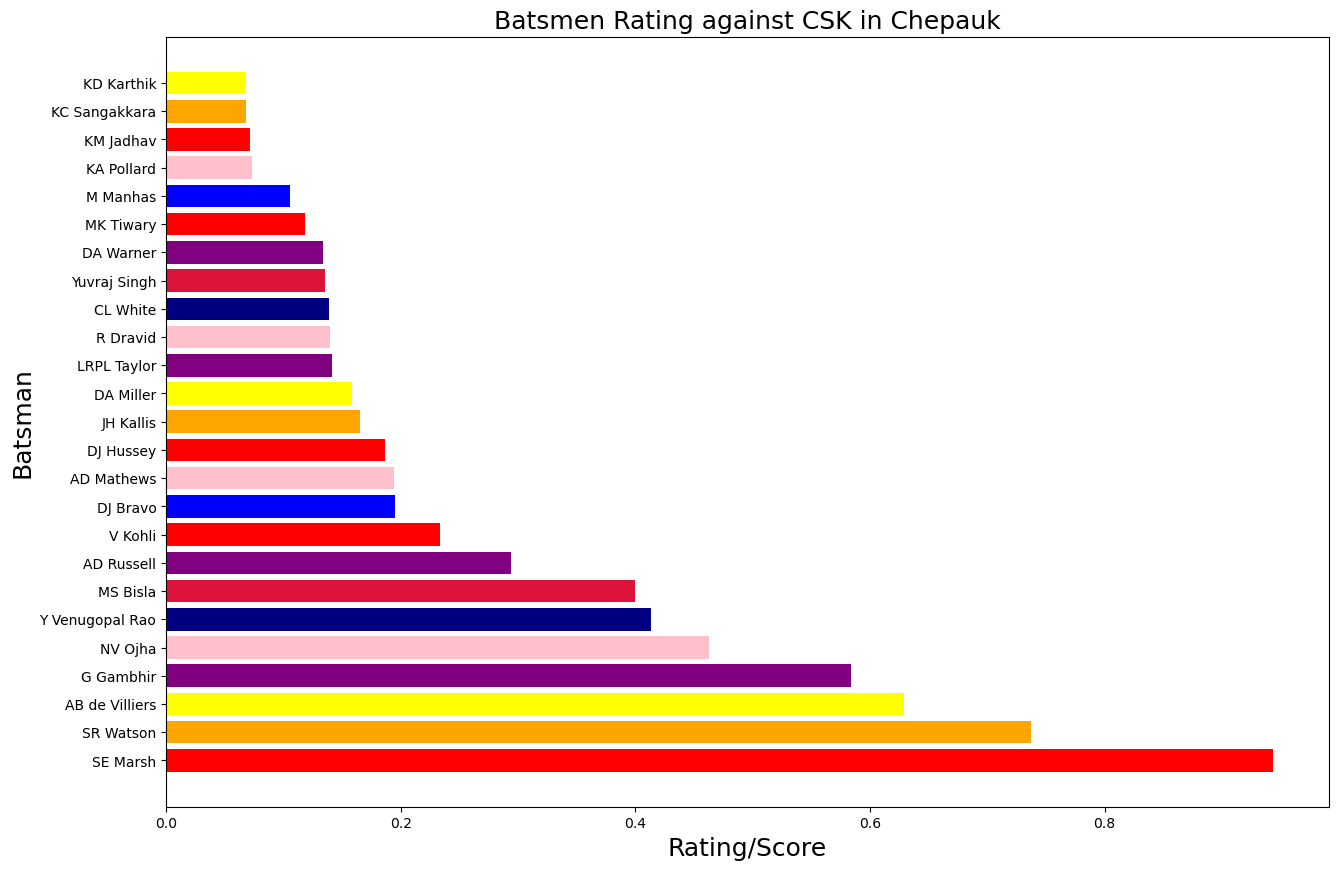

In [49]:
plt.figure(figsize=(15, 10))
colors = ['red', 'orange', 'yellow', 'purple', 'pink', 'navy', 'Crimson', 'purple', 'red', 'blue','pink']
plt.barh(Final_df.Batsman, Final_df.Score, color=colors)
plt.title('Batsmen Rating against CSK in Chepauk', fontsize=18)
plt.xlabel('Rating/Score', fontsize=18)
plt.ylabel('Batsman', fontsize=18)
plt.show()
